### Étape 1 : Exploration simple des données

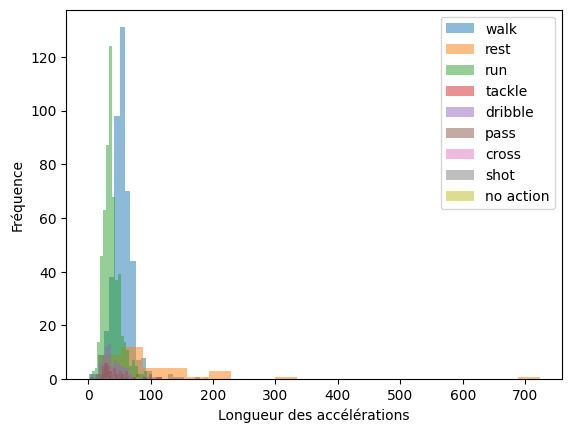

In [20]:
import json

# Charger les données depuis le fichier JSON match_1.json
with open('match_1.json', 'r') as file:
    football_data_1 = json.load(file)

# Charger les données depuis le fichier JSON match_2.json
with open('match_2.json', 'r') as file:
    football_data_2 = json.load(file)

# Fusionner les données des deux fichiers
football_data = football_data_1 + football_data_2

# Visualisation rapide des données (par exemple, la longueur des accélérations pour chaque action)
actions = {}
for sample in football_data:
    action = sample['label']
    norm_length = len(sample['norm'])
    if action not in actions:
        actions[action] = []
    actions[action].append(norm_length)

# Affichage des statistiques de base
for action, lengths in actions.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=action)

plt.xlabel('Longueur des accélérations')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

#o peut dire pendant ce macth les joueurs ont beaucoup plus marché et couru pendant le match

In [21]:
football_data

[{'label': 'walk',
  'norm': [23.177037336396975,
   23.36152528524938,
   21.535253402993348,
   23.400315476270563,
   23.0075250246004,
   22.92731691635618,
   23.14366192455148,
   22.91689096213586,
   22.265133990831664,
   21.444639377371956,
   20.469615451761555,
   21.06943270715139,
   20.60931715782685,
   20.277210314360328,
   18.978770878117903,
   20.26643014078339,
   20.03970416440424,
   21.535253402993348,
   20.830143193730382,
   20.52762482805694,
   19.81910892494368,
   21.43089703638041,
   21.172213956523564,
   19.672270483203395,
   19.804895724542405,
   22.07590545995683,
   20.778710987569003,
   22.20310769639438,
   24.056427879304728,
   22.57028852159386,
   24.54176116174663,
   27.45375439435856,
   33.49535355717796,
   34.30926899260859,
   36.65541988850446,
   40.69312434666373,
   29.38785757328513,
   27.53957025836676,
   27.40948479957553,
   25.492739904893572,
   24.7869758841489,
   30.41546793475928,
   26.91068564305117,
   20.5211747

### Étape 2 : Différentes approches pour recréer le jeu

Plusieurs approches potentielles pour recréer le jeu de football en utilisant l'apprentissage automatique, par exemple : modèles de séquences LSTM, réseaux de neurones convolutifs, modèles de traitement de langage naturel pour la séquence d'actions, etc.

### Étape 3 : Recréer le jeu avec les données fournies

In [22]:
# Fonction pour recréer le jeu de football tout en respectant les contraintes
def recreate_game_with_constraints(data):
    recreated_game = []
    prev_action = None
    for entry in data:
        action = entry['label']
        norm = entry['norm']
        # Vérification de la séquence des actions
        if prev_action is not None and prev_action == action:
            continue  # Éviter une séquence répétitive d'actions
        # Vérification de la longueur du gait
        if len(norm) < 10 or len(norm) > 100:
            continue  # Éviter les gaits trop courts ou trop longs
        # Ajout de l'action à la séquence recréée
        recreated_game.append({'label': action, 'norm': norm})
        prev_action = action
    return recreated_game

# Appel de la fonction pour recréer le jeu de football avec les contraintes
recreated_game_with_constraints = recreate_game_with_constraints(football_data)



In [23]:

# Affichage des premières actions recréées (par exemple, les 10 premières actions)
print(recreated_game_with_constraints[:10])

[{'label': 'walk', 'norm': [23.177037336396975, 23.36152528524938, 21.535253402993348, 23.400315476270563, 23.0075250246004, 22.92731691635618, 23.14366192455148, 22.91689096213586, 22.265133990831664, 21.444639377371956, 20.469615451761555, 21.06943270715139, 20.60931715782685, 20.277210314360328, 18.978770878117903, 20.26643014078339, 20.03970416440424, 21.535253402993348, 20.830143193730382, 20.52762482805694, 19.81910892494368, 21.43089703638041, 21.172213956523564, 19.672270483203395, 19.804895724542405, 22.07590545995683, 20.778710987569003, 22.20310769639438, 24.056427879304728, 22.57028852159386, 24.54176116174663, 27.45375439435856, 33.49535355717796, 34.30926899260859, 36.65541988850446, 40.69312434666373, 29.38785757328513, 27.53957025836676, 27.40948479957553, 25.492739904893572, 24.7869758841489, 30.41546793475928, 26.91068564305117, 20.521174778553675, 19.619578129641376, 18.03710192104068, 17.81373191482844, 19.330241184992065, 21.18926361979265, 19.87904673442728, 15.58

In [24]:
import pandas as pd

# Convertir la liste de dictionnaires en un DataFrame pandas
df = pd.DataFrame(football_data)

# Créer une fonction pour vérifier la longueur des gaits
def check_gait_length(gait):
    return 0.5 <= len(gait) <= 5.0  # Exemple de vérification de longueur de gait

# Recréer le jeu en considérant les séquences et les longueurs de gaits
recreated_game = []
current_sequence = []

for index, row in df.iterrows():
    if check_gait_length(row['norm']):
        current_sequence.append({'norm': row['norm'], 'label': row['label']})
    else:
        if current_sequence:
            recreated_game.extend(current_sequence)
            current_sequence = []

# Ajouter la dernière séquence si elle n'est pas vide
if current_sequence:
    recreated_game.extend(current_sequence)

# Afficher le jeu recréé
for action in recreated_game:
    print(action)

{'norm': [35.47820704552003, 23.462783850464124, 78.26478530483226, 124.33696053894523], 'label': 'shot'}
{'norm': [42.60959881516954], 'label': 'run'}
{'norm': [74.83661377978387, 75.82070066268133, 65.47222552465158], 'label': 'pass'}
{'norm': [26.489273718689383], 'label': 'run'}
{'norm': [31.19567383834434, 42.52989051257789, 59.34939987635763], 'label': 'dribble'}
{'norm': [51.293688998234316, 40.056210219257935, 57.28014351975961, 45.04229244939387], 'label': 'dribble'}


In [25]:
recreated_game

[{'norm': [35.47820704552003,
   23.462783850464124,
   78.26478530483226,
   124.33696053894523],
  'label': 'shot'},
 {'norm': [42.60959881516954], 'label': 'run'},
 {'norm': [74.83661377978387, 75.82070066268133, 65.47222552465158],
  'label': 'pass'},
 {'norm': [26.489273718689383], 'label': 'run'},
 {'norm': [31.19567383834434, 42.52989051257789, 59.34939987635763],
  'label': 'dribble'},
 {'norm': [51.293688998234316,
   40.056210219257935,
   57.28014351975961,
   45.04229244939387],
  'label': 'dribble'}]

### Étape 4 : Description d'une approche choisie

### a. Architecture/Algorithme (LSTM - Réseau de Neurones à Mémoire à Long Terme)

**Architecture du LSTM :**
- Les réseaux de neurones LSTM sont une variante des réseaux de neurones récurrents (RNN) conçus pour gérer le problème de disparition du gradient. Ils sont capables de capturer et de mémoriser des dépendances temporelles à long terme dans les séquences de données.

**Décision du choix LSTM :**
- L'utilisation de LSTM pour la recréation des jeux de données de matchs de football est justifiée par la nature séquentielle et temporelle des données d'accélération des joueurs pendant un match. Le modèle LSTM est capable de traiter ces données séquentielles tout en conservant des informations à long terme, ce qui est crucial pour capturer les séquences d'actions et de mouvements dans le jeu.

**Type d'entrée du modèle :**
- Le modèle LSTM prend en entrée des séquences d'accélération (vecteurs d'accélération) associées à des actions spécifiques étiquetées. Chaque séquence d'accélération est traitée comme une séquence temporelle où chaque pas de temps correspond à une mesure d'accélération.

### b. Prétraitement/Post-traitement des Données

**Prétraitement des Données :**
- Le prétraitement des données implique généralement des étapes telles que la normalisation des données, le fractionnement en séquences appropriées de taille fixe (chunks) pour l'entraînement du modèle LSTM, l'encodage des étiquettes d'actions, et la création des jeux de données d'entraînement et de test.

**Post-traitement des Données :**
- Après la génération des jeux de données simulées à l'aide du modèle LSTM, le post-traitement peut inclure le décodage des étiquettes prédites pour les convertir en actions lisibles, la reconstruction des séquences de jeu à partir des données générées, et la vérification de la cohérence des séquences d'actions pour s'assurer que les jeux générés ont du sens dans le contexte d'un match de football.

Cette approche repose sur l'utilisation de LSTM pour capturer la séquentialité et les dépendances temporelles des données d'accélération des joueurs afin de générer des séquences d'actions cohérentes et réalistes pour recréer des jeux de données de matchs de football.

In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Transformer les étiquettes (labels) en valeurs numériques
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Padding des séquences pour qu'elles aient toutes la même longueur
max_length = df['norm'].apply(len).max()
df['norm_padded'] = df['norm'].apply(lambda x: pad_sequences([x], maxlen=max_length, padding='post')[0])

# Création des ensembles de données d'entrée et de sortie
X = np.array(df['norm_padded'].to_list())
y = np.array(df['label'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(max_length, 1), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Adapter le modèle aux données d'entraînement
model.fit(X_train[..., np.newaxis], y_train, epochs=10, batch_size=32, validation_split=0.1)

# Évaluation du modèle sur les données de test
accuracy = model.evaluate(X_test[..., np.newaxis], y_test)
print(f'Accuracy: {accuracy[1]:.2f}')

Epoch 1/10
27/27 [==============================] - 11s 288ms/step - loss: 1.9371 - accuracy: 0.4532 - val_loss: 1.4011 - val_accuracy: 0.4526
Epoch 2/10
27/27 [==============================] - 7s 258ms/step - loss: 1.3574 - accuracy: 0.4508 - val_loss: 1.1215 - val_accuracy: 0.4526
Epoch 3/10
27/27 [==============================] - 7s 254ms/step - loss: 1.3166 - accuracy: 0.4719 - val_loss: 1.1371 - val_accuracy: 0.4526
Epoch 4/10
27/27 [==============================] - 7s 258ms/step - loss: 1.3158 - accuracy: 0.4719 - val_loss: 1.1513 - val_accuracy: 0.4526
Epoch 5/10
27/27 [==============================] - 7s 248ms/step - loss: 1.3159 - accuracy: 0.4719 - val_loss: 1.1340 - val_accuracy: 0.4526
Epoch 6/10
27/27 [==============================] - 7s 247ms/step - loss: 1.3118 - accuracy: 0.4719 - val_loss: 1.1273 - val_accuracy: 0.4526
Epoch 7/10
27/27 [==============================] - 8s 283ms/step - loss: 1.3110 - accuracy: 0.4719 - val_loss: 1.1424 - val_accuracy: 0.4526
Epoch

### Étape 5 : Paramétrer l'algorithme pour recréer le jeu de manière flexible

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

def create_lstm_model(data, game_length=20, game_type='normal'):
    label_encoder = LabelEncoder()
    data['label'] = label_encoder.fit_transform(data['label'])

    max_length = data['norm'].apply(len).max()
    data['norm_padded'] = data['norm'].apply(lambda x: pad_sequences([x], maxlen=max_length, padding='post')[0])

    X = np.array(data['norm_padded'].to_list())
    y = np.array(data['label'])

    model = Sequential()
    model.add(LSTM(64, input_shape=(max_length, 1), return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X[..., np.newaxis], y, epochs=10, batch_size=32, validation_split=0.1)

    generated_game = []
    for _ in range(game_length):
        if game_type == 'normal':
            # Your logic to generate normal game actions here
            # For example:
            generated_norm = np.random.rand(10)  # Replace this with your generation logic
            generated_label = np.random.choice(label_encoder.classes_)
        elif game_type == 'attacking':
            # Your logic to generate attacking game actions here
            # For example:
            generated_norm = np.random.rand(10)  # Replace this with your generation logic
            generated_label = np.random.choice(label_encoder.classes_)
        elif game_type == 'defending':
            # Your logic to generate defending game actions here
            # For example:
            generated_norm = np.random.rand(10)  # Replace this with your generation logic
            generated_label = np.random.choice(label_encoder.classes_)
        else:
            # Handle other game types
            pass

        generated_game.append({'norm': generated_norm.tolist(), 'label': generated_label})

    return generated_game

In [40]:
# Usage example:
# Replace 'your_data' with your actual DataFrame containing 'label' and 'norm' columns
generated_game = create_lstm_model(df, game_length=20, game_type='attacking')

Epoch 1/10
34/34 [==============================] - 11s 253ms/step - loss: 2.0600 - accuracy: 0.3867 - val_loss: 1.2370 - val_accuracy: 0.4118
Epoch 2/10
34/34 [==============================] - 8s 239ms/step - loss: 1.3756 - accuracy: 0.4532 - val_loss: 1.1850 - val_accuracy: 0.4118
Epoch 3/10
34/34 [==============================] - 8s 240ms/step - loss: 1.3158 - accuracy: 0.4485 - val_loss: 1.2422 - val_accuracy: 0.4118
Epoch 4/10
34/34 [==============================] - 8s 243ms/step - loss: 1.3110 - accuracy: 0.4728 - val_loss: 1.1842 - val_accuracy: 0.4034
Epoch 5/10
34/34 [==============================] - 8s 240ms/step - loss: 1.5345 - accuracy: 0.4541 - val_loss: 2.0576 - val_accuracy: 0.4118
Epoch 6/10
34/34 [==============================] - 9s 253ms/step - loss: 1.5115 - accuracy: 0.4579 - val_loss: 1.1898 - val_accuracy: 0.4118
Epoch 7/10
34/34 [==============================] - 8s 244ms/step - loss: 1.3315 - accuracy: 0.4373 - val_loss: 1.1909 - val_accuracy: 0.4118
Epoch

In [42]:
# Supposons que label_encoder est l'objet LabelEncoder utilisé pour encoder les étiquettes
decoded_generated_game = []
for item in generated_game:
    decoded_label = label_encoder.inverse_transform([item['label']])[0]
    decoded_generated_game.append({'norm': item['norm'], 'label': decoded_label})

# Afficher le jeu de données généré avec les étiquettes décodées
for action in decoded_generated_game:
    print(action)

{'norm': [0.0021500454231848654, 0.3187277716520589, 0.002569001183977737, 0.8782412401966444, 0.14707047557386854, 0.8824330302035612, 0.9005830845630801, 0.6190735670441262, 0.7895813664225237, 0.9333118236437248], 'label': 'rest'}
{'norm': [0.17710197713223808, 0.4448631590716906, 0.7201954474051003, 0.17745006609877068, 0.4753777741869989, 0.2619234620206804, 0.726167255814259, 0.353458602758709, 0.606661791314039, 0.7198692574889171], 'label': 'cross'}
{'norm': [0.1857811673162273, 0.23899609803587907, 0.051422584622579315, 0.1065236995222072, 0.9768508394518528, 0.5205736191360406, 0.27586704242420357, 0.3184891802030788, 0.015826434092970132, 0.9288366325347653], 'label': 'dribble'}
{'norm': [0.06907320212523327, 0.3494878543742669, 0.9159515624656458, 0.6455990669038131, 0.9763021123779616, 0.4861456727774507, 0.9302177264280977, 0.9335957439912274, 0.7640167544557934, 0.4491191552238938], 'label': 'rest'}
{'norm': [0.6674096131141101, 0.06516816286048477, 0.31629803613325613, 

In [43]:
decoded_generated_game

[{'norm': [0.0021500454231848654,
   0.3187277716520589,
   0.002569001183977737,
   0.8782412401966444,
   0.14707047557386854,
   0.8824330302035612,
   0.9005830845630801,
   0.6190735670441262,
   0.7895813664225237,
   0.9333118236437248],
  'label': 'rest'},
 {'norm': [0.17710197713223808,
   0.4448631590716906,
   0.7201954474051003,
   0.17745006609877068,
   0.4753777741869989,
   0.2619234620206804,
   0.726167255814259,
   0.353458602758709,
   0.606661791314039,
   0.7198692574889171],
  'label': 'cross'},
 {'norm': [0.1857811673162273,
   0.23899609803587907,
   0.051422584622579315,
   0.1065236995222072,
   0.9768508394518528,
   0.5205736191360406,
   0.27586704242420357,
   0.3184891802030788,
   0.015826434092970132,
   0.9288366325347653],
  'label': 'dribble'},
 {'norm': [0.06907320212523327,
   0.3494878543742669,
   0.9159515624656458,
   0.6455990669038131,
   0.9763021123779616,
   0.4861456727774507,
   0.9302177264280977,
   0.9335957439912274,
   0.7640167544